In [6]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn

In [7]:


t = np.arange(0, 20, 0.1)

#random data on x-axis
A  = np.random.rand()
b    = 20*np.random.rand()
ceta = 2*np.random.rand()*np.pi

signal =  A*np.sin(t+ceta)+b
y      =  signal + 0.1*np.random.randn(len(t))


print(f"A = {A}, ceta = {ceta} b= {b}")

A = 0.5929415692077172, ceta = 5.396419680771073 b= 6.038952373195254


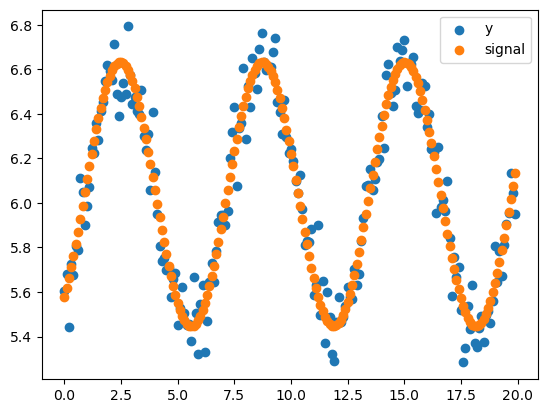

In [8]:

plt.scatter(t,y)
plt.scatter(t,signal)
plt.legend(['y','signal'])

In [9]:
# Create the linear regression model

class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.ceta = torch.nn.Parameter(torch.randn(3))
       

    def forward(self, x):
        return self.ceta[0]*torch.sin(x+self.ceta[1])+self.ceta[2]


model = MyModel()

model

MyModel()

In [10]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

In [15]:
# In ML we want our data to be of shape:
# (num_samples x num_dimensions)
N = len(t)
X = t.reshape(N, 1)
Y = y.reshape(N, 1)

# PyTorch uses float32 by default
# Numpy creates float64 by default
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [18]:
# Train the model
n_epochs = 1000
losses = []
for it in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  outputs = model(inputs)
  loss = criterion(outputs, targets)

  # keep the loss so we can plot it later
  losses.append(loss.item())
    
  # Backward and optimize
  loss.backward()
  optimizer.step()
    
  print(f'Epoch {it+1}/{n_epochs}, Loss: {loss.item():.4f}')

Epoch 1/1000, Loss: 0.1956
Epoch 2/1000, Loss: 0.1740
Epoch 3/1000, Loss: 0.1561
Epoch 4/1000, Loss: 0.1411
Epoch 5/1000, Loss: 0.1286
Epoch 6/1000, Loss: 0.1181
Epoch 7/1000, Loss: 0.1092
Epoch 8/1000, Loss: 0.1017
Epoch 9/1000, Loss: 0.0952
Epoch 10/1000, Loss: 0.0897
Epoch 11/1000, Loss: 0.0849
Epoch 12/1000, Loss: 0.0807
Epoch 13/1000, Loss: 0.0771
Epoch 14/1000, Loss: 0.0738
Epoch 15/1000, Loss: 0.0709
Epoch 16/1000, Loss: 0.0683
Epoch 17/1000, Loss: 0.0660
Epoch 18/1000, Loss: 0.0638
Epoch 19/1000, Loss: 0.0619
Epoch 20/1000, Loss: 0.0600
Epoch 21/1000, Loss: 0.0583
Epoch 22/1000, Loss: 0.0567
Epoch 23/1000, Loss: 0.0552
Epoch 24/1000, Loss: 0.0538
Epoch 25/1000, Loss: 0.0524
Epoch 26/1000, Loss: 0.0511
Epoch 27/1000, Loss: 0.0499
Epoch 28/1000, Loss: 0.0487
Epoch 29/1000, Loss: 0.0476
Epoch 30/1000, Loss: 0.0465
Epoch 31/1000, Loss: 0.0454
Epoch 32/1000, Loss: 0.0444
Epoch 33/1000, Loss: 0.0434
Epoch 34/1000, Loss: 0.0424
Epoch 35/1000, Loss: 0.0415
Epoch 36/1000, Loss: 0.0405
E

In [22]:
for name, param in model.state_dict().items():
    print(f"{name}: {param}")

ceta: tensor([ 0.5890, -0.9045,  6.0350])


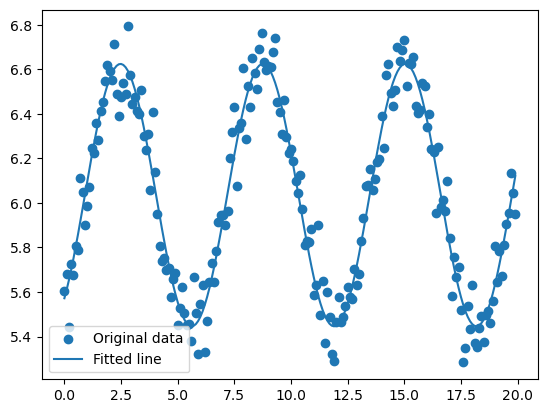

In [19]:
# Plot the graph
predicted = model(inputs).detach().numpy()
plt.scatter(X, Y, label='Original data')
plt.plot(X, predicted, label='Fitted line')
plt.legend()
plt.show()